In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hourly_data = pd.read_csv('data/hour.csv')

In [3]:
print(f"Shape of dat:{hourly_data.shape}")
print(f"number of missing values in the data:\
      {hourly_data.isnull().sum().sum()}")

Shape of dat:(17379, 17)
number of missing values in the data:      0


In [4]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [5]:
hourly_data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
preprocessed_data = hourly_data.copy()
#transform seasons
seasons_mapping = {1:'winter', 2:'spring', \
                   3:'summer', 4:'fall'}
preprocessed_data['season'] = preprocessed_data['season']. \
    apply(lambda x:seasons_mapping[x])

In [7]:
#transform year
year_mapping = {0:2011, 1:2012}
preprocessed_data['yr'] = preprocessed_data['yr'].\
    apply(lambda x:year_mapping[x])

In [8]:
#transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                    6: 'Saturday'}
preprocessed_data['weekday'] = preprocessed_data['weekday'].\
    apply(lambda x:weekday_mapping[x])

In [9]:
#transorm weathersit
weather_mapping = {1:'clear', 2:'cloudy' \
                   , 3:'light_rain_snow', 4:'heavy_rain_snow'}

preprocessed_data['weathersit'] = preprocessed_data['weathersit'].\
apply(lambda x: weather_mapping[x])

In [10]:
preprocessed_data['hum'] = preprocessed_data['hum'] * 100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] * 67

In [11]:
cols = ['season','yr','weekday','weathersit','hum','windspeed']
preprocessed_data[cols].sample(10,random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [12]:
preprocessed_data[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
yr,17379.0,2011.502561,0.500008,2011.0,2011.0000,2012.000,2012.0000,2012.0000
hum,17379.0,62.722884,19.292983,0.0,48.0000,63.000,78.0000,100.0000
windspeed,17379.0,12.736540,8.196795,0.0,7.0015,12.998,16.9979,56.9969


In [13]:
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal to total number of rides'

/tmp/ipykernel_11658/460475670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['registered'], label='registered')
/tmp/ipykernel_11658/460475670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['casual'], label='casual')


Text(0.5, 1.0, 'Rides distributions')

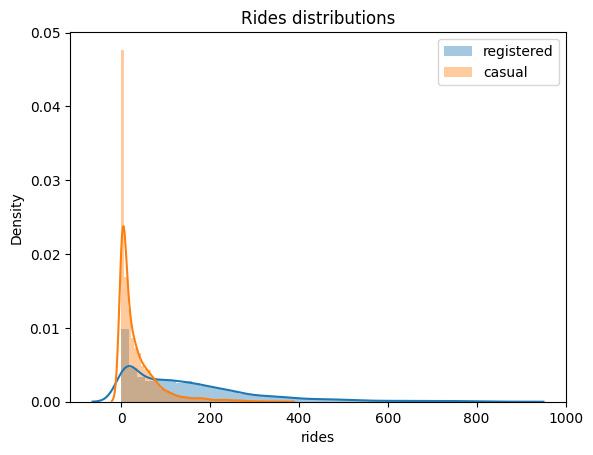

In [14]:
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
# plt.savefig('figs/rides_distributions.png', format='png')

Text(0.5, 1.0, 'Rides distributions')

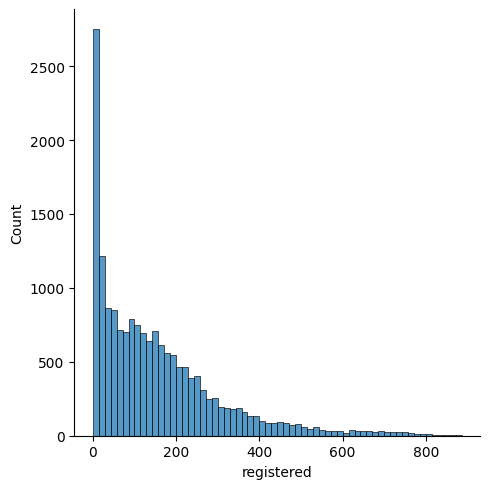

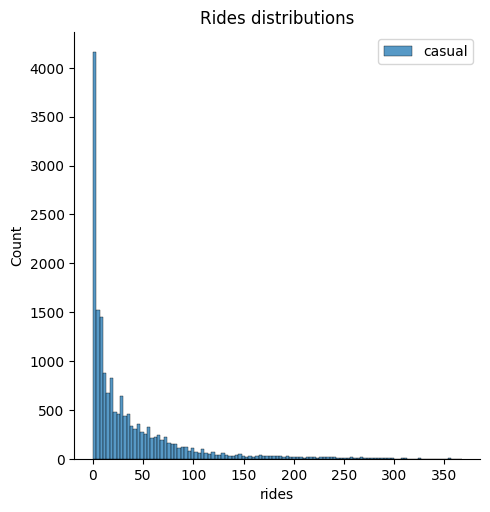

In [15]:
sns.displot(preprocessed_data['registered'], label='registered')
sns.displot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
# plt.savefig('figs/rides_distributions.png', format='png')

Text(0, 0.5, 'number of rides per day')

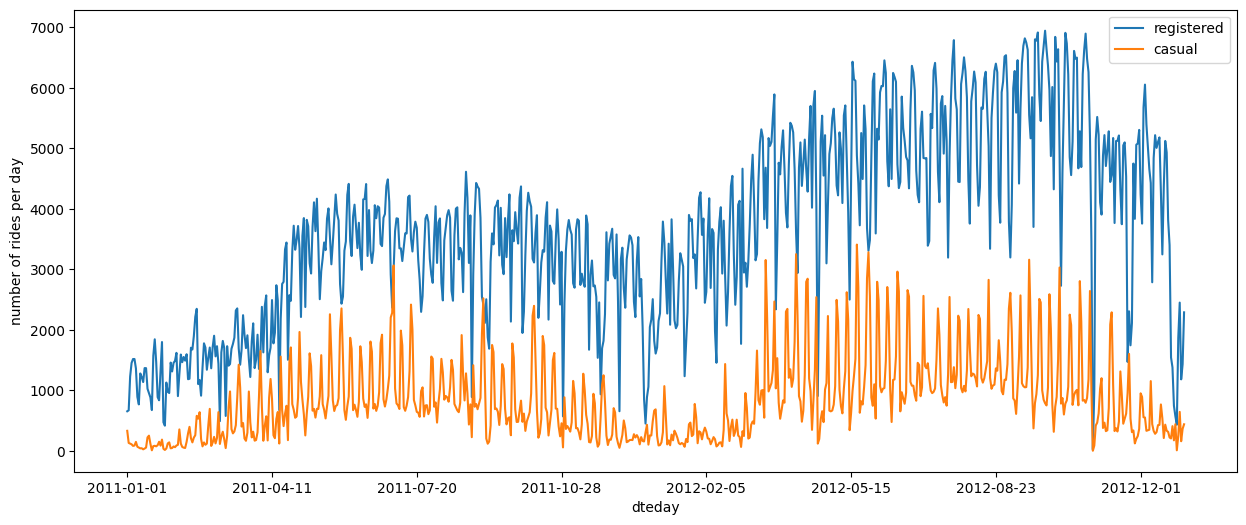

In [16]:
plot_data = preprocessed_data[['registered','casual','dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(15,6))
ax.set_label('time')
ax.set_ylabel('number of rides per day')

Text(0, 0.5, 'number of rides per day')

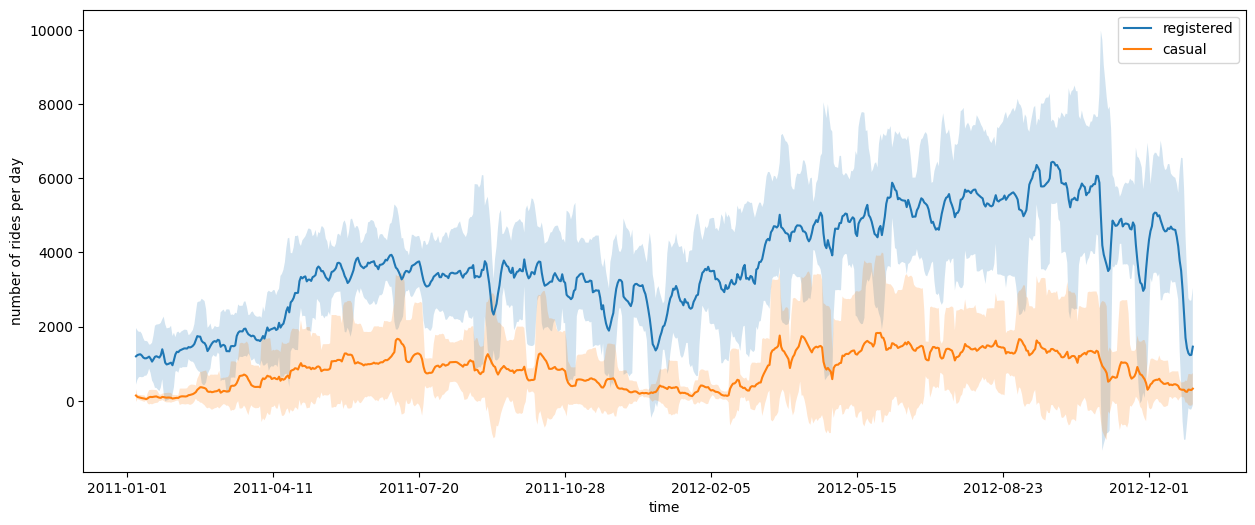

In [17]:
plot_data = preprocessed_data[['registered', 'casual','dteday']]
plot_data = plot_data.groupby('dteday').sum()
#lets set the number of rows in one aggregation
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_dev = plot_data.rolling(window).std()


ax = rolling_means.plot(figsize=(15,6))
ax.fill_between(rolling_means.index,rolling_means['registered'] \
                + 2* rolling_dev['registered'], 
                rolling_means['registered'] \
                -2 * rolling_dev['registered'],\
                    alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_dev['casual'], \
                    rolling_means['casual'] \
                        - 2*rolling_dev['casual'], \
                            alpha = 0.2)
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


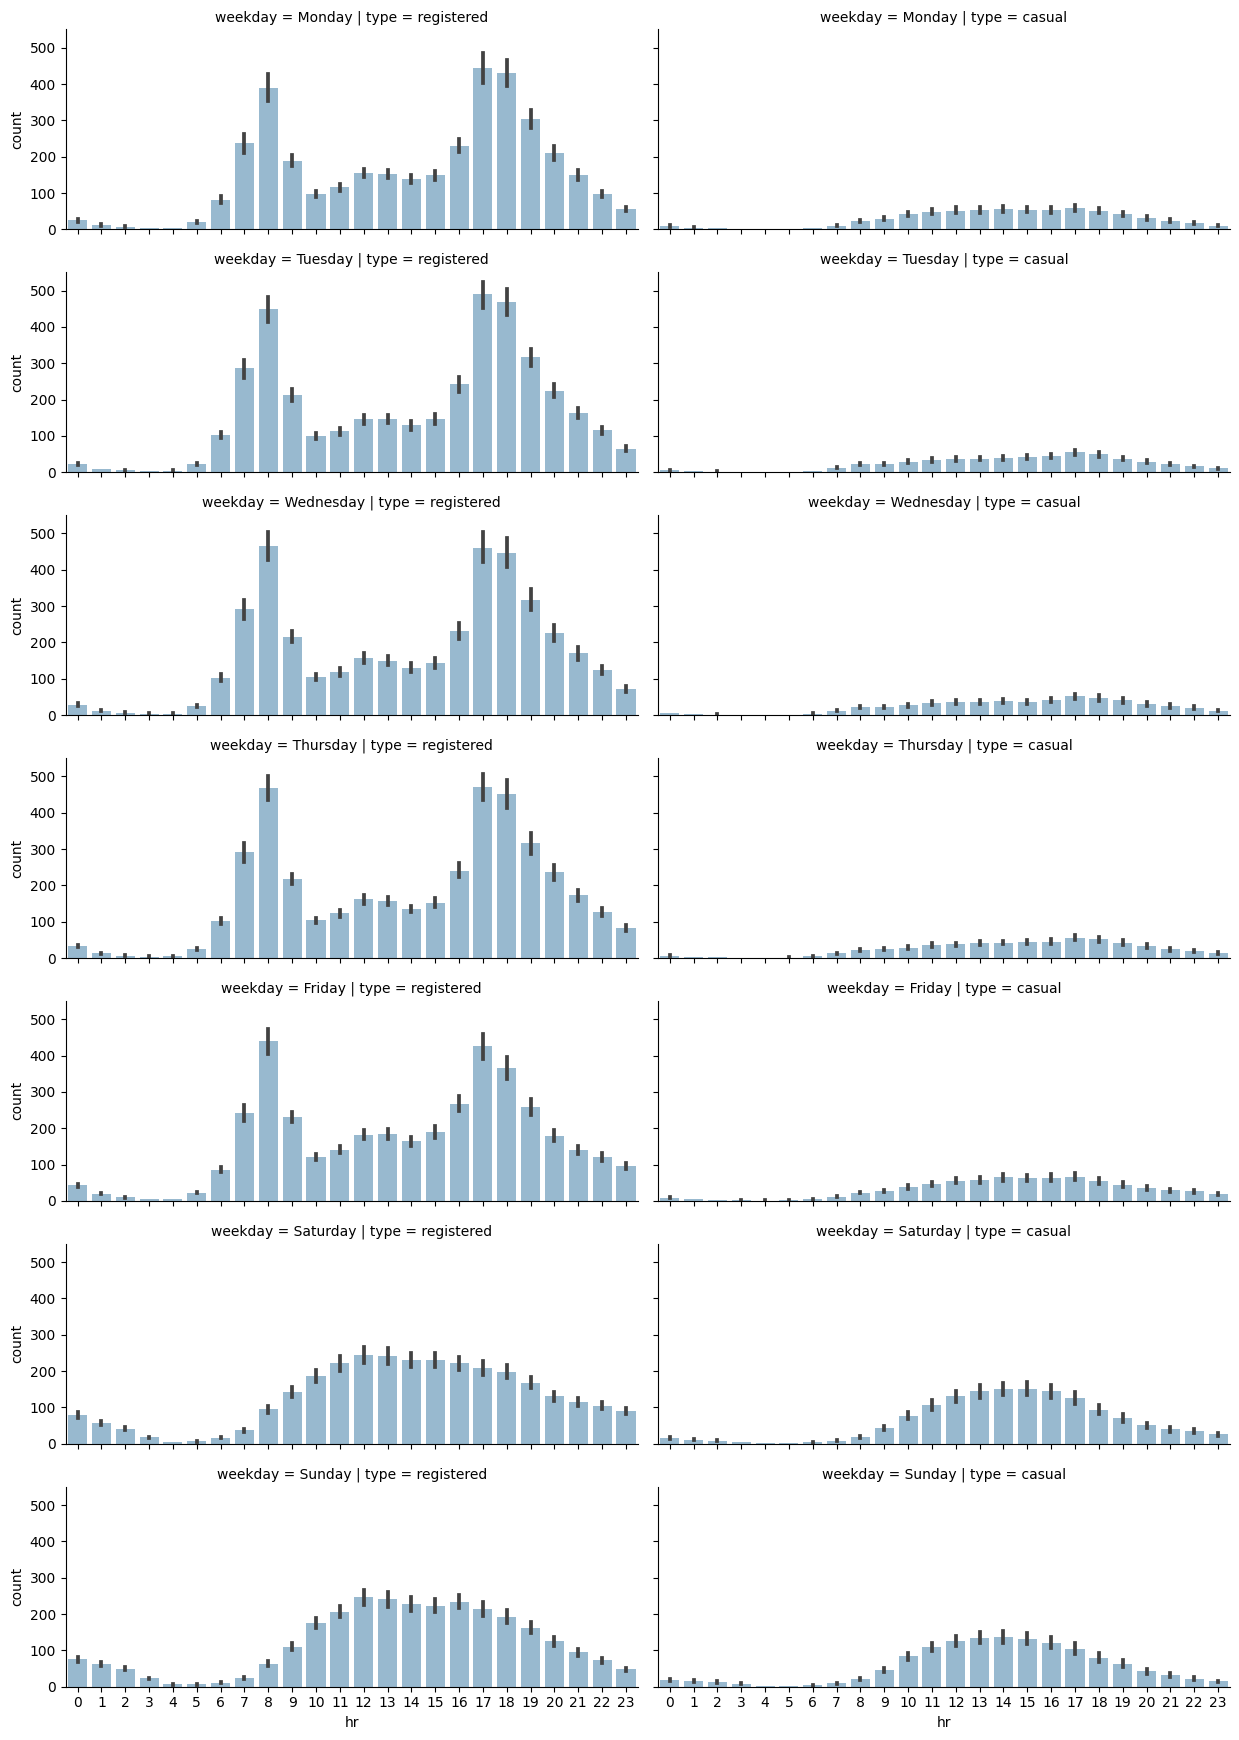

In [18]:
plot_data = preprocessed_data[['hr','weekday','registered','casual']]
plot_data = plot_data.melt(id_vars = ['hr','weekday'], \
                           var_name= 'type',value_name='count')
# melt make a pivot table
# plot_data
grid = sns.FacetGrid(plot_data,row = 'weekday', \
                     col='type', height=2.5, aspect=2.5, \
                        row_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

In [19]:
plot_data = preprocessed_data[['hr','season','registered','casual']]
plot_data = plot_data.melt(id_vars=['hr','season'], \
                           var_name='type',value_name='count')
plot_data

# Pivot and unpivot are two operations commonly used in data transformation or reshaping, especially when working with relational databases or spreadsheets.

# Pivoting is the process of converting rows of data into columns, based on a certain criteria or grouping variable. In other words, pivoting allows you to reorganize the structure of your data from a long format to a wide format. For example, if you have a table with sales data for different products and regions, you can pivot the data to create a new table where the columns represent the different products and the rows represent the different regions.

# Unpivoting is the opposite of pivoting, where columns are converted into rows. This is often used to normalize the structure of data, making it easier to analyze and manipulate. For example, if you have a table with sales data in a wide format, you can unpivot the data to create a new table where the rows represent the different products and the columns represent the different regions.

# Both pivot and unpivot are useful techniques for transforming data, and can be used to improve the efficiency and accuracy of data analysis and reporting.


,hr,season,type,count
0,0,winter,registered,13
1,1,winter,registered,32
2,2,winter,registered,27
3,3,winter,registered,10
4,4,winter,registered,1
...,...,...,...,...
34753,19,winter,casual,11
34754,20,winter,casual,8
34755,21,winter,casual,7
34756,22,winter,casual,13


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


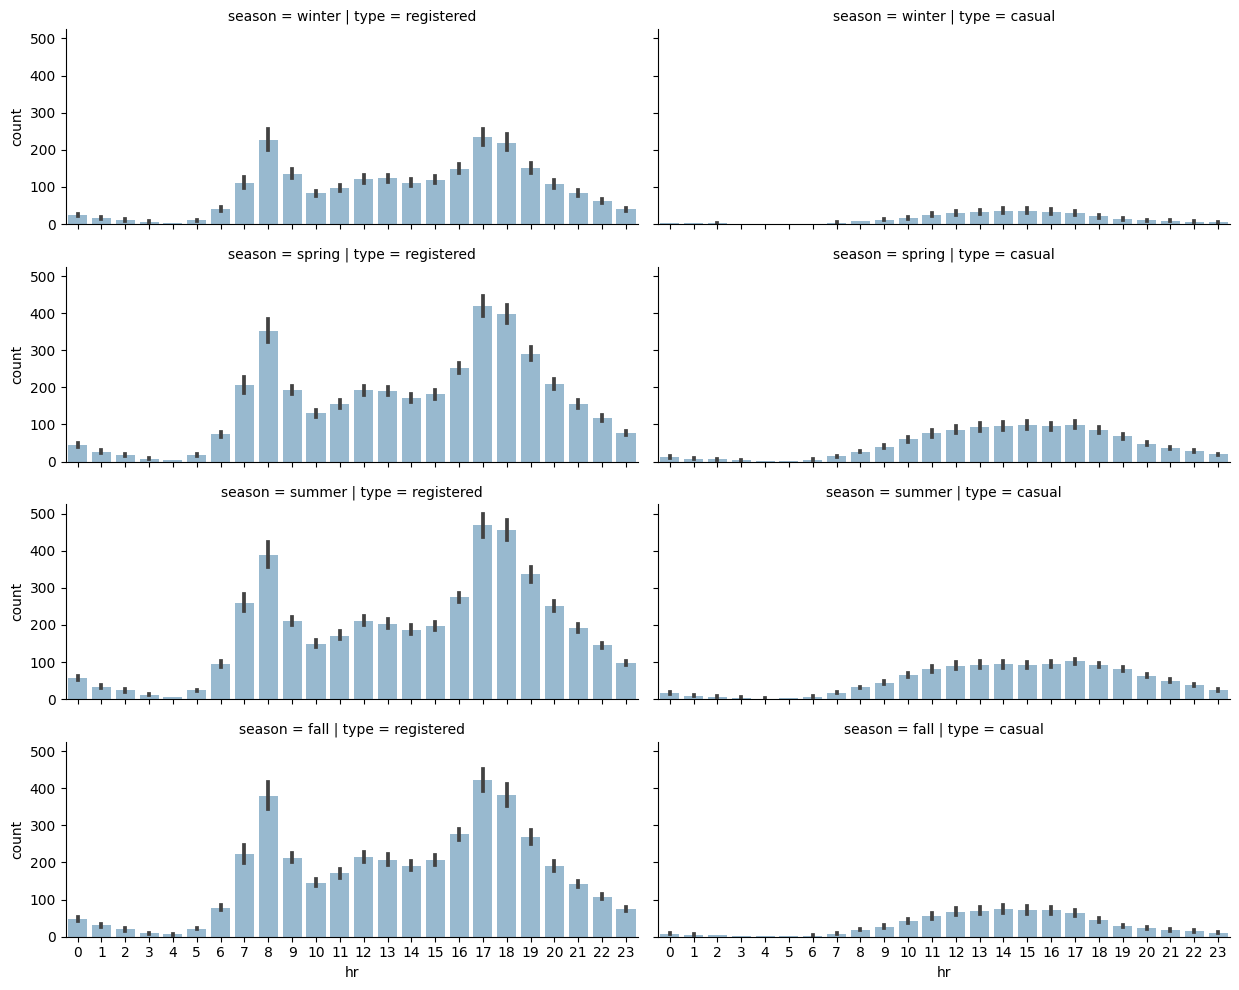

In [20]:
grid = sns.FacetGrid(plot_data,row='season',col='type',height=2.5, \
                     aspect=2.5 , row_order=['winter','spring','summer','fall'])
grid.map(sns.barplot,'hr','count',alpha = 0.5)

In [21]:
plot_data = preprocessed_data[['season', 'weekday','casual', 'registered']]
plot_data =plot_data.melt(id_vars=['season','weekday'], \
                          var_name='type',value_name='count')
plot_data

,season,weekday,type,count
0,winter,Saturday,casual,3
1,winter,Saturday,casual,8
2,winter,Saturday,casual,5
3,winter,Saturday,casual,3
4,winter,Saturday,casual,0
...,...,...,...,...
34753,winter,Monday,registered,108
34754,winter,Monday,registered,81
34755,winter,Monday,registered,83
34756,winter,Monday,registered,48


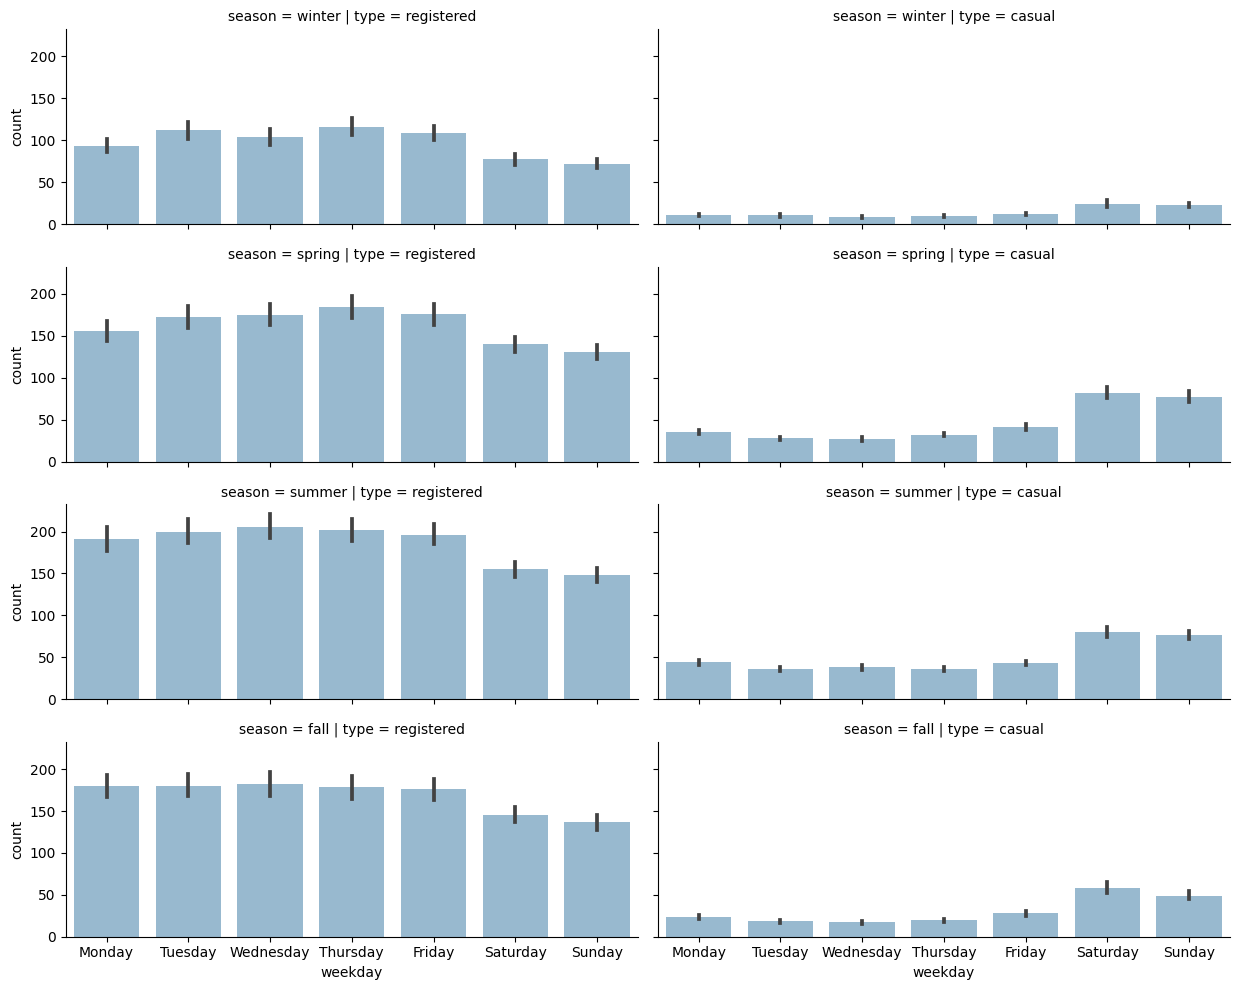

In [22]:
grid = sns.FacetGrid(plot_data, row='season',col='type', \
                     height=2.5, aspect=2.5 , row_order=['winter','spring','summer','fall'], col_order=['registered','casual'])
grid.map(sns.barplot,'weekday','count',alpha=0.5, \
         order =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [23]:
# from thefuzz import fuzz
# s1 = 'انا عبدالرحمن من مصر تشرفت بمعرفتك يا استاذ احمد'
# s2 = 'هلا بالغالي'
# fuzz.WRatio(s1,s2)

In [24]:
population_mean = preprocessed_data.registered.mean()
population_mean

153.78686920996606

In [25]:
sample = preprocessed_data[(preprocessed_data['season'] == 'summer') \
                            & (preprocessed_data['yr'] == 2011)]['registered']
sample.head(10)

4010     23
4011     12
4012      5
4013      2
4014      7
4015     22
4016    107
4017    288
4018    368
4019    243
Name: registered, dtype: int64

In [26]:
sample.mean()

144.73214285714286

In [27]:
#perform t-test and compute p-value
# alpha = 0.05 standard value
from scipy.stats import ttest_1samp
test_res = ttest_1samp(sample,population_mean)
print(f'test statistic :{test_res[0]}, p-value = {test_res[1]}')

test statistic :-3.491969148378619, p-value = 0.0004887645279519517


p-value is smaller than alpha so, we are gonna to reject null hypothesis, the alternative hypothesis is correct

In [28]:
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased,population_mean)
print(f'test statistic :{test_result_unbiased[0]}, p-value = {test_result_unbiased[1]}')

test statistic :-0.1275260689451959, p-value = 0.8985535788745094


In [29]:
weekend_days = ['Saturday','Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingday_mask = ~ preprocessed_data.weekday.isin(weekend_days)

weekend_data = preprocessed_data.registered[weekend_mask]
workingday_data = preprocessed_data.registered[workingday_mask]

In [30]:
from scipy.stats import ttest_ind 
test_result = ttest_ind(weekend_data, workingday_data)
print(f'statistic value: {test_result[0]:.03f}, p-value = {test_result[1]:.03f}')

statistic value: -16.004, p-value = 0.000


/tmp/ipykernel_11658/195284923.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data,label='weekend days')
/tmp/ipykernel_11658/195284923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingday_data,label='working days')


Text(0.5, 1.0, 'Registered rides distributions')

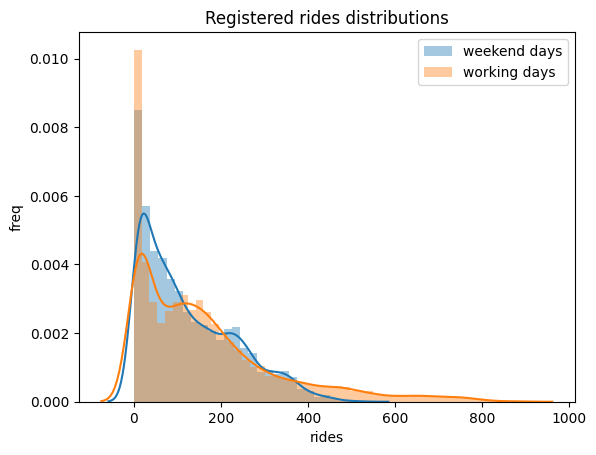

In [31]:
sns.distplot(weekend_data,label='weekend days')
sns.distplot(workingday_data,label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('freq')
plt.title('Registered rides distributions')

In [32]:
weekend_data = preprocessed_data.casual[weekend_mask]
workingday_data = preprocessed_data.casual[workingday_mask]

test_res = ttest_ind(weekend_data,workingday_data)
print(f'Statistic value:{test_res[0]:.3f} , p-value : {test_res[1]:.3f}')


Statistic value:41.077 , p-value : 0.000


/tmp/ipykernel_11658/1114324907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data, label='weekend days')
/tmp/ipykernel_11658/1114324907.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingday_data,label='working days')


Text(0.5, 1.0, 'Casual rides dist')

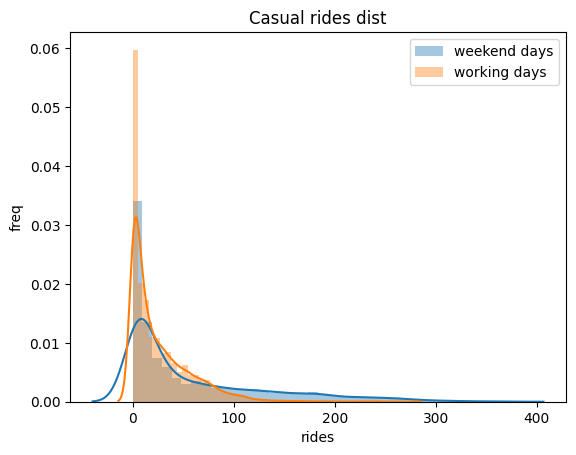

In [33]:

sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingday_data,label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('freq')
plt.title('Casual rides dist')

In [34]:
def plot_correlations(data, col):
# get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, \
                    scatter_kws={"alpha":0.05}, \
                    label=f"Registered rides \
                    (correlation: {corr_r:.3f})")
# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, \
                    scatter_kws={"alpha":0.05}, \
                    label=f"Casual rides (correlation: {corr_c:.3f})")
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
        ax.set_ylabel('rides')
        ax.set_title(f"Correlation between rides and {col}")
        return ax

/tmp/ipykernel_11658/3895859973.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


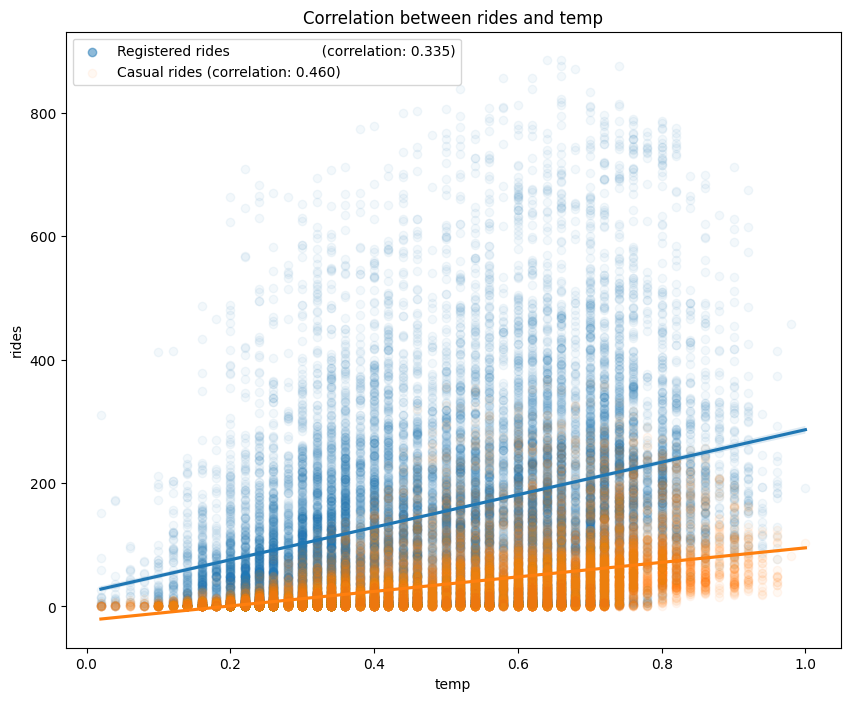

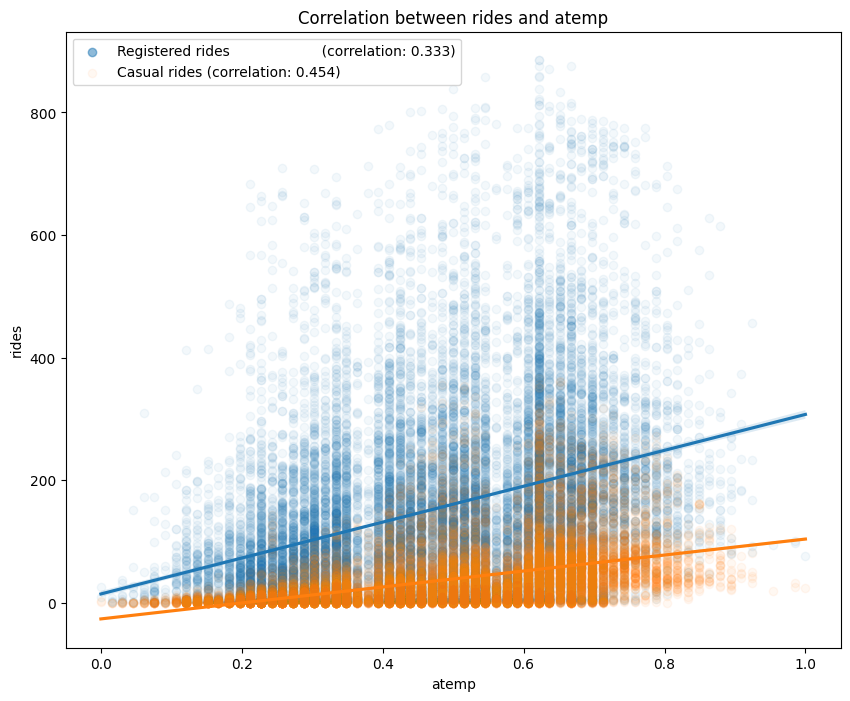

In [35]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')
# plt.savefig('figs/correlation_temp.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
# plt.savefig('figs/correlation_atemp.png', format='png')

/tmp/ipykernel_11658/3895859973.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


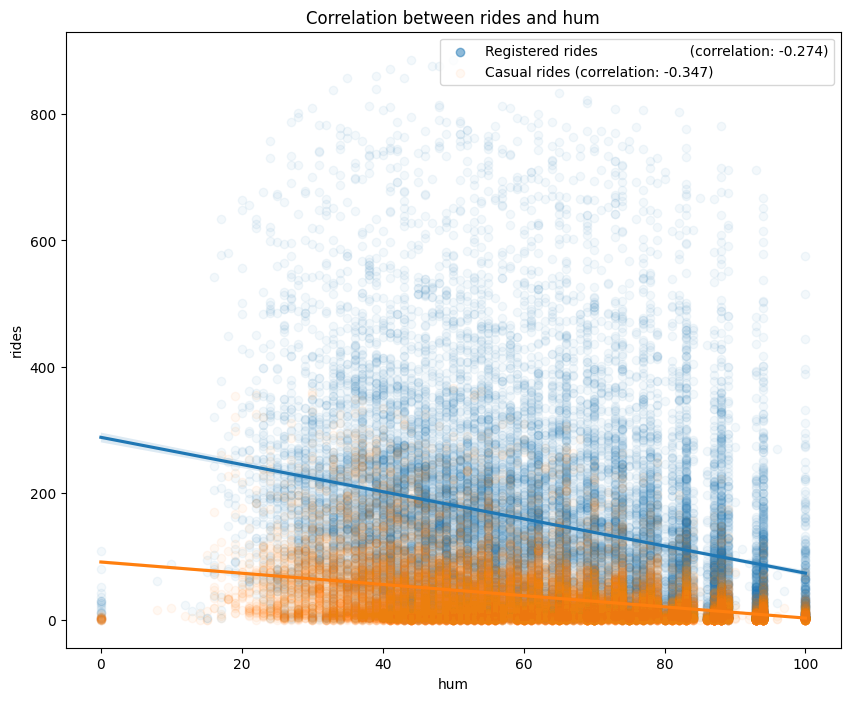

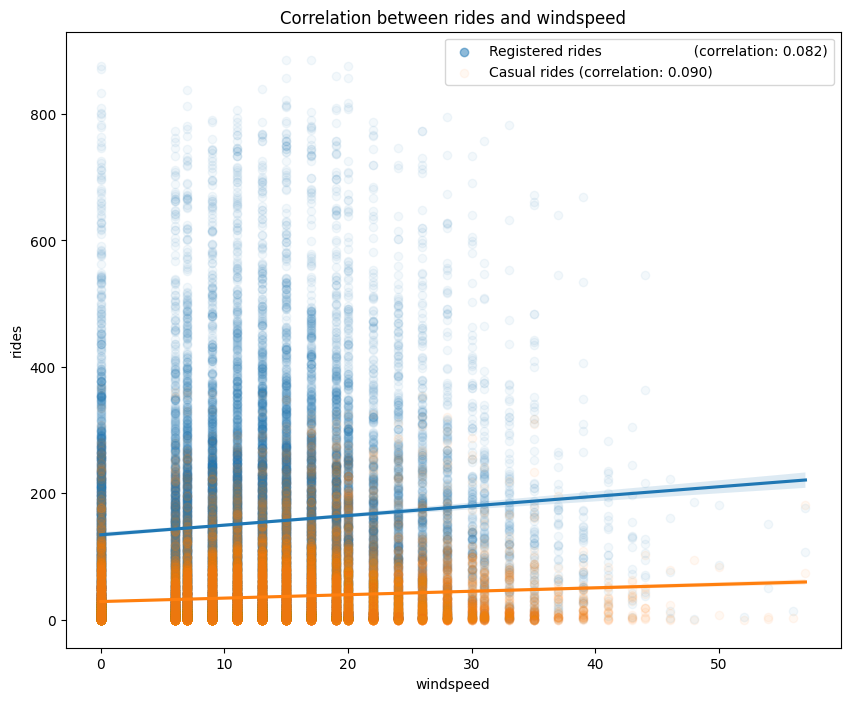

In [36]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data,'hum')

plt.figure(figsize=(10,8))
ax= plot_correlations(preprocessed_data,'windspeed')

(5.5, -0.5)

<Figure size 2000x2000 with 0 Axes>

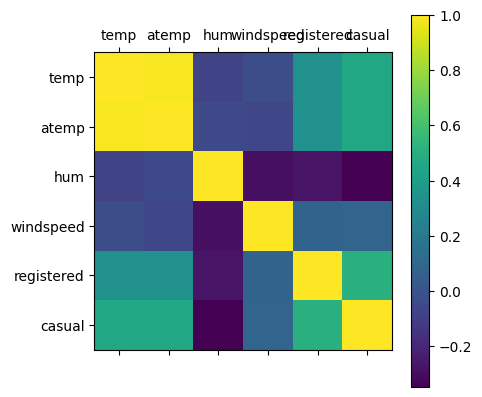

In [37]:
cols = ['temp','atemp','hum','windspeed','registered','casual']
plot_data = preprocessed_data[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(20,20))
plt.matshow(corr)
plt.xticks(range(len(plot_data.columns)),plot_data.columns)
plt.yticks(range(len(plot_data.columns)),plot_data.columns)
plt.colorbar()
plt.ylim([5.5,-0.5])

In [38]:
import pandas as pd
data = {'cat':['a','a','b','b','a'],
        'val':[10,20,30,40,50]}
df = pd.DataFrame(data)
def custom_agg(arr):
    mean_val = arr.mean()
    std_val = arr.std()

    return {'mean':mean_val, 'std':std_val}


In [39]:
# !python -m pip install statsmodels

In [40]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts, window=10, **kwargs):
# create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()
    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]
    # print(adfuller(ts))
    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")
    # print(plot_data.head(12))

In [41]:
# get daily rides
daily_rides = preprocessed_data[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()
# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

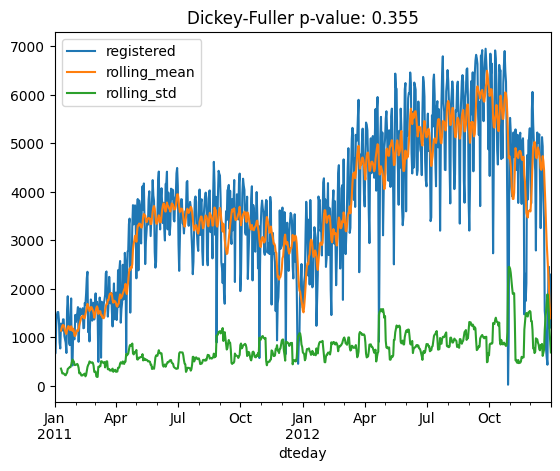

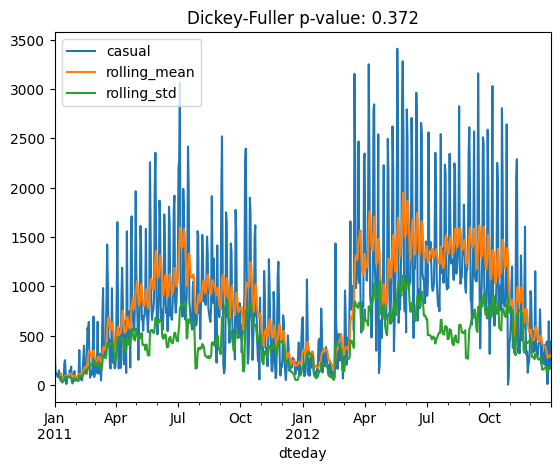

In [42]:
test_stationarity(daily_rides['registered'])
test_stationarity(daily_rides['casual'])

In [43]:
registered = daily_rides['registered']
# print(registered)
registered_ma = registered.rolling(10).mean()
# print(registered_ma)
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)
# registered_ma_diff
casual = daily_rides['casual']
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

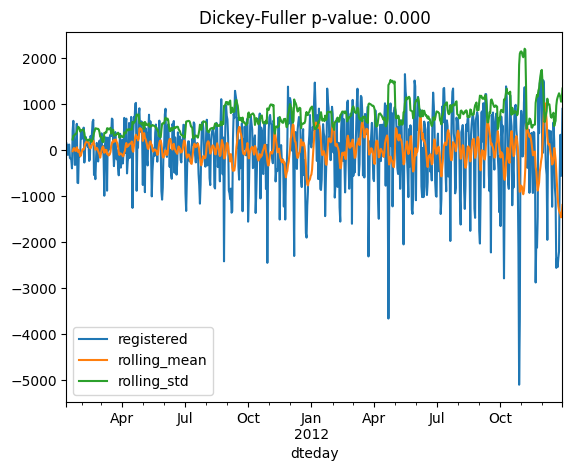

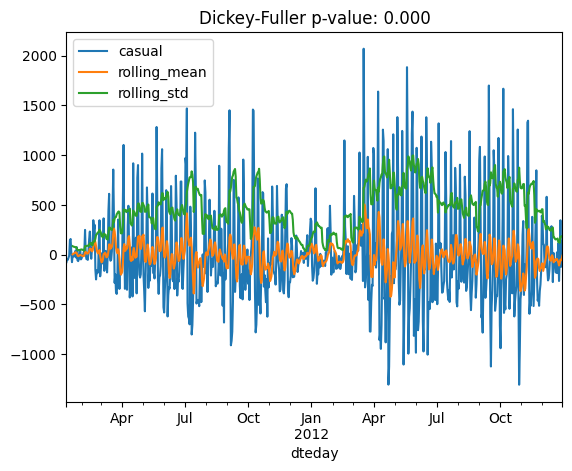

In [44]:
test_stationarity(registered_ma_diff)
test_stationarity(casual_ma_diff)


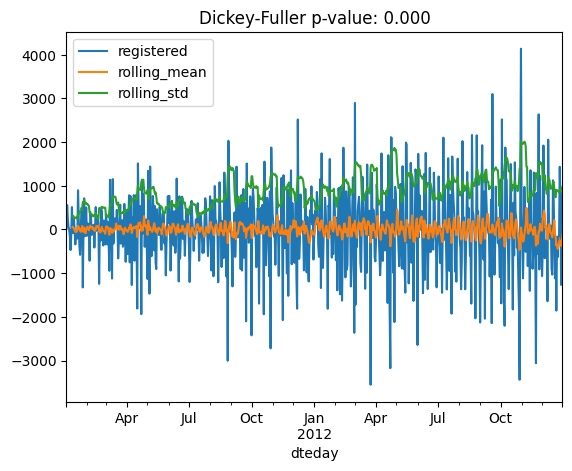

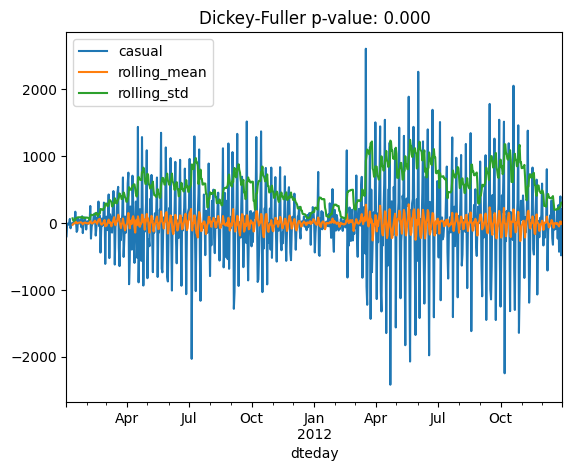

In [45]:
registered = daily_rides['registered']
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides['casual']
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)
test_stationarity(registered_diff)
test_stationarity(casual_diff)


In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

registered_decomposition = seasonal_decompose(daily_rides['registered'])
casual_decomposition = seasonal_decompose(daily_rides['casual'])

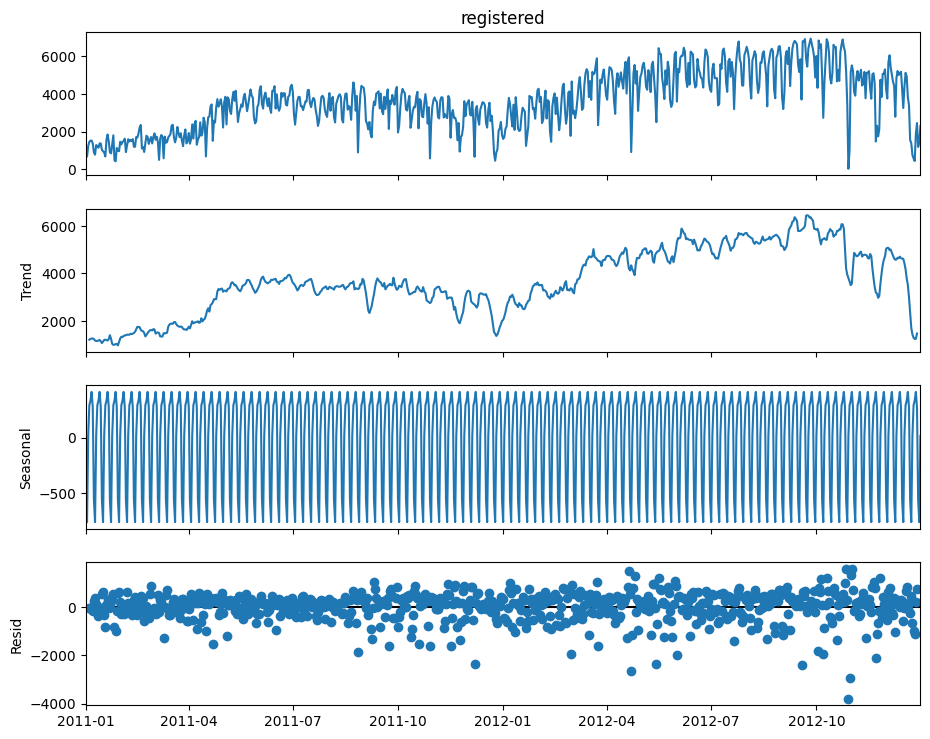

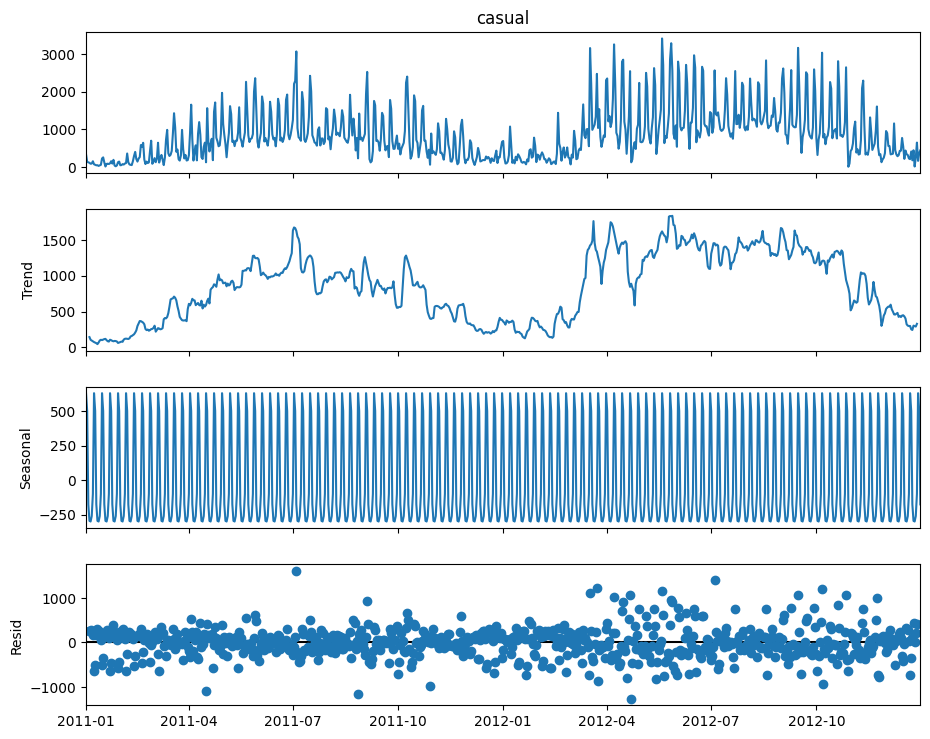

In [47]:
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10,8)
casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10,8)

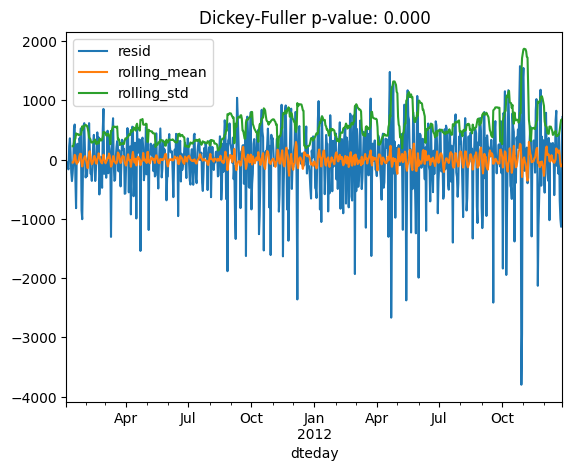

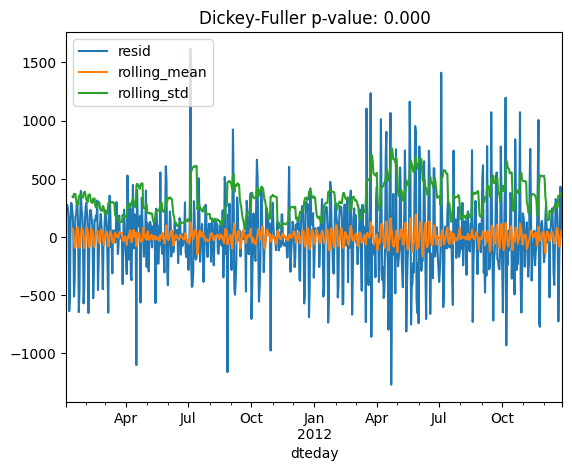

In [48]:
test_stationarity(registered_decomposition.resid.dropna())
test_stationarity(casual_decomposition.resid.dropna())


In [49]:
# for i in range(1,101):
#     tmp = ''
#     if i %3 == 0:
#         tmp += 'Fizz'
#     if i %5 == 0:
#         tmp += 'Buzz'
#     print(tmp or i)

In [56]:
def func1():
    return {1:1}
def func2():
    print('2')
def func3():
    print('3')

In [57]:
number = int(input())
func_map = {1:func1, 2:func2}
func_map.get(number,func3)

<function __main__.func1()>

In [62]:
dics = {1:'m',2:'a'}
number = int(input())
dics.get(number,'Error')

'm'